<b> Problem 1: Take the fat data and use the percentage of body fat, siri, as the response, and
the other variables except brozek and density as potential predictors. Remove every tenth
observation from the data for use as a test sample. Use the remaining data as a training
sample building the following models:

(a) Linear Regression with all predictors

(b) Linear regression with variables selected using BIC by using stepwise elimination.

(c) Principal Components Regression by selecting the number of PC's using Cross-Validation.

(d) Lasso regression

(e) Use the previous models you fitted in (a) to (d) to predict the response in the test
sample. Make a report on the models' performance by using the Root Mean Square
Error (RMSE). Which model performed best?

In [2]:
library('faraway')

In [6]:
data(fat)
head(fat,2)

brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2


In [12]:
test_data_idx = seq(from = 10, to = nrow(fat), by = 10)
fat_trn = fat[-test_data_idx,]
fat_tst = fat[test_data_idx,]

<b>(a) Build Linear Regression with all predictors

In [15]:
mod_lin = lm(siri ~ .-brozek-density, fat_trn)

In [16]:
summary(mod_lin)


Call:
lm(formula = siri ~ . - brozek - density, data = fat_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8314 -0.6722  0.1828  0.9150  6.6619 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.591885   6.448868  -1.953 0.052193 .  
age           0.007978   0.012320   0.648 0.517983    
weight        0.362999   0.023314  15.570  < 2e-16 ***
height        0.049026   0.040315   1.216 0.225315    
adipos       -0.514032   0.114074  -4.506 1.09e-05 ***
free         -0.564773   0.014889 -37.933  < 2e-16 ***
neck          0.016525   0.089863   0.184 0.854272    
chest         0.120219   0.039590   3.037 0.002694 ** 
abdom         0.140108   0.042186   3.321 0.001056 ** 
hip           0.006197   0.056101   0.110 0.912148    
thigh         0.195057   0.054460   3.582 0.000424 ***
knee          0.106637   0.093534   1.140 0.255542    
ankle         0.125118   0.081303   1.539 0.125325    
biceps        0.096199   0.064656   1.488 0.138278    
f

<b>(b) Build Linear regression with variables selected using BIC by using stepwise elimination.

In [26]:
# install.packages('leaps')
library(leaps)
mod_lin_vs = regsubsets(siri ~ .-brozek-density, fat_trn)
mod_lin_vs_summary = summary(mod_lin_vs)
mod_lin_vs_summary$which

(Intercept),age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE


In [57]:
n = nrow(fat_trn)
msize = 2:9
BICs = n*log(mod_lin_vs_summary$rss/n) + msize*log(n)
BICs
which.min(BICs)

[1] 734.9550 272.9660 264.5296 261.2504 249.6412 243.2637 238.7148 240.0451

[1] 7

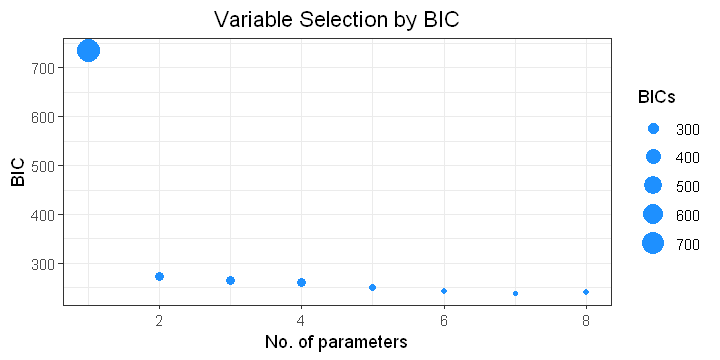

In [135]:
library('ggplot2')
options(repr.plot.width=6, repr.plot.height=3)

plot1 <- ggplot(data = data.frame(msize, BICs), aes(x = msize-1, y = BICs, size = BICs))+
    geom_point()+
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    geom_point(color = 'dodgerblue')+
    labs(title='Variable Selection by BIC', x='No. of parameters', y = 'BIC')
plot1

In [37]:
mod_final_cv = lm(siri ~ weight+adipos+free+chest+abdom+thigh+forearm, fat_trn)

In [41]:
summary(mod_final_cv)


Call:
lm(formula = siri ~ weight + adipos + free + chest + abdom + 
    thigh + forearm, data = fat_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0226 -0.5667  0.2136  0.8846  7.3072 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.10003    3.27933  -0.335 0.737612    
weight       0.38940    0.01904  20.449  < 2e-16 ***
adipos      -0.56961    0.09277  -6.140 3.84e-09 ***
free        -0.55874    0.01418 -39.410  < 2e-16 ***
chest        0.12036    0.03837   3.136 0.001945 ** 
abdom        0.14634    0.03872   3.779 0.000203 ***
thigh        0.19170    0.04358   4.399 1.69e-05 ***
forearm      0.28758    0.06689   4.299 2.58e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.565 on 219 degrees of freedom
Multiple R-squared:  0.9674,	Adjusted R-squared:  0.9663 
F-statistic: 927.8 on 7 and 219 DF,  p-value: < 2.2e-16


<b>(c) Principal Components Regression by selecting the number of PC's using Cross-Validation.

In [405]:
# install.packages('pls')
library(pls)
mod_pcr = pcr(siri ~ .-brozek-density, data = fat_trn, ncomp=15, scale = TRUE)
summary(mod_pcr)

Data: 	X dimension: 227 15 
	Y dimension: 227 1
Fit method: svdpc
Number of components considered: 15
TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       62.90    73.17    80.41    84.99    88.98    91.43    93.60    95.42
siri    36.65    62.19    63.67    63.71    65.59    82.69    84.05    84.06
      9 comps  10 comps  11 comps  12 comps  13 comps  14 comps  15 comps
X       96.74     97.95     98.80     99.31     99.62     99.88    100.00
siri    91.02     91.86     92.52     92.77     93.76     93.81     96.92


Select optimum number of components

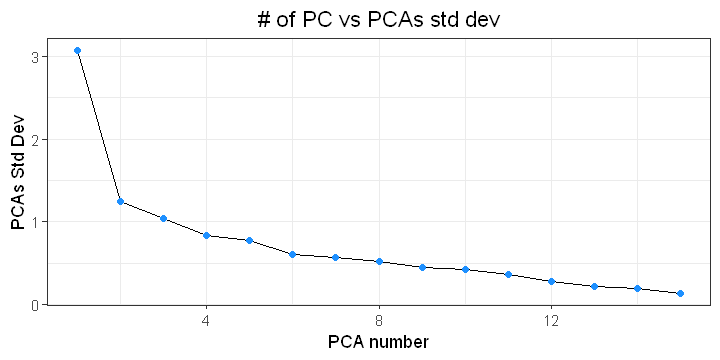

In [407]:
fat_pca <- prcomp(fat_trn[, -3:-1], scale = TRUE)

options(repr.plot.width=6, repr.plot.height=3)

plot1 <- ggplot(data = data.frame(1:15, fat_pca$sdev[1:15]), aes(x = 1:15, y = fat_pca$sdev[1:15]))+
    geom_line()+
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    geom_point(color = 'dodgerblue')+
    labs(title='# of PC vs PCAs std dev', x='PCA number', y = 'PCAs Std Dev')
plot1

* From the above plot, we can see that after 4 number of PCAs, there is significant decrease in cumulative % variation explained.

#### Selection PCA which minimizes RMSE

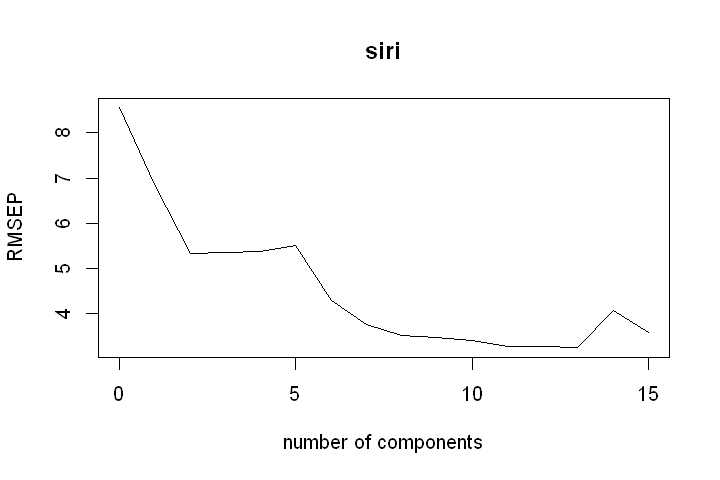

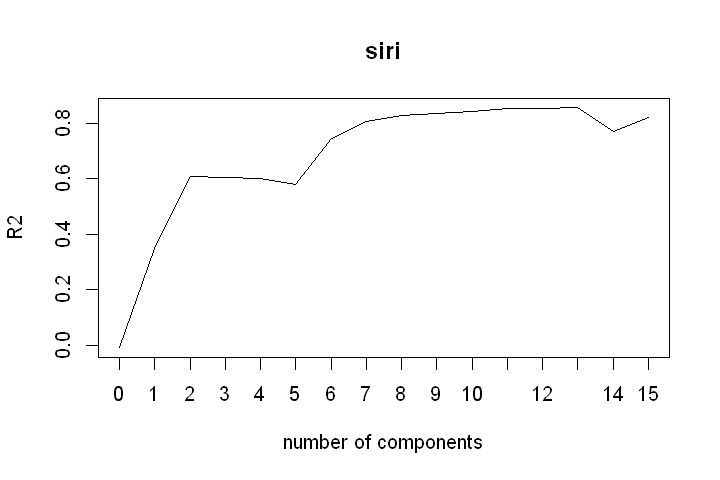

In [469]:
#Use 10-fold Cross-Validation
set.seed(123)
mod_pcr_cv = pcr(siri ~ .-brozek-density, data=fat_trn, validation="CV",ncomp=15, scale = TRUE)

pcrCV = RMSEP(mod_pcr_cv, estimate="CV")

options(repr.plot.width=6, repr.plot.height=4)

plot(pcrCV)
validationplot(mod_pcr_cv, val.type = "R2")
axis(side=1, at=seq(0, 15, by=1))

In [442]:
which.min(pcrCV$val)
pcrCV$val

[1] 14

, , model = (Intercept)

        response
estimate     siri
      CV 8.550888

, , model = 1 comps

        response
estimate     siri
      CV 6.863953

, , model = 2 comps

        response
estimate     siri
      CV 5.341944

, , model = 3 comps

        response
estimate     siri
      CV 5.347972

, , model = 4 comps

        response
estimate     siri
      CV 5.388019

, , model = 5 comps

        response
estimate     siri
      CV 5.518304

, , model = 6 comps

        response
estimate     siri
      CV 4.296745

, , model = 7 comps

        response
estimate     siri
      CV 3.761318

, , model = 8 comps

        response
estimate     siri
      CV 3.519037

, , model = 9 comps

        response
estimate     siri
      CV 3.476165

, , model = 10 comps

        response
estimate     siri
      CV 3.404519

, , model = 11 comps

        response
estimate     siri
      CV 3.283599

, , model = 12 comps

        response
estimate     siri
      CV 3.274745

, , model = 13 comps

        response
estimate     siri
      CV 3.247831

, , model = 14 comps

        response
estimate    siri
      CV 4.07177

, , model = 15 comps

        response
estimate     siri
      CV 3.599715

* With 14 principle components, we get min RMSE.
* But, 10 principle components explain more than 80% variation.

<b> (d) Build Lasso regression

In [176]:
fat_trn_x = as.matrix(fat_trn[, -3:-1])
fat_tst_x = as.matrix(fat_tst[, -3:-1])

* Build cross validated lasso regression model

In [187]:
library('glmnet')
mod_cv_lasso = cv.glmnet(x=fat_trn_x , y=fat_trn$siri, alpha = 1)
coef(mod_cv_lasso, s=mod_cv_lasso$lambda.min)

16 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) -12.77985378
age           .         
weight        0.29716332
height        0.09248681
adipos        .         
free         -0.50465875
neck          .         
chest         0.04253080
abdom         0.18228390
hip           .         
thigh         0.10130032
knee          0.20691171
ankle         0.04657393
biceps        0.07585771
forearm       0.21277081
wrist         .         

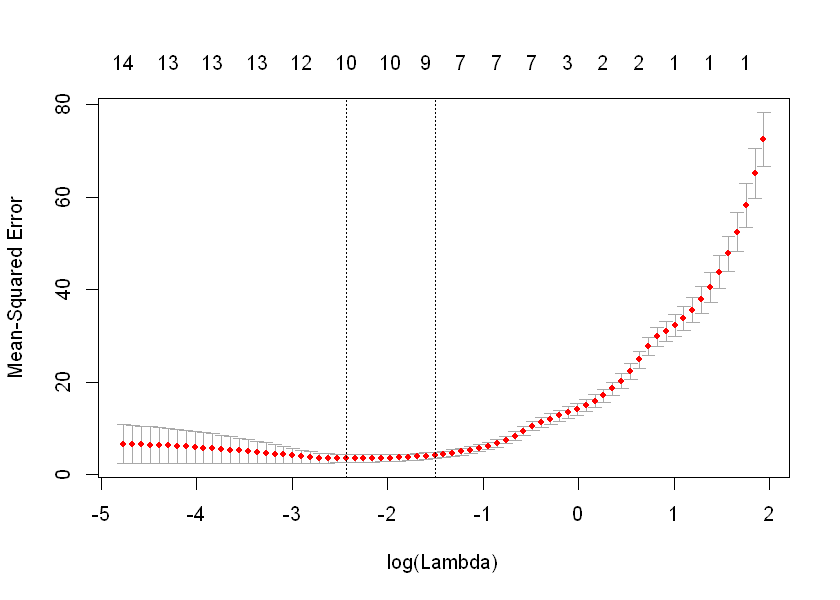

In [196]:
options(repr.plot.width=7, repr.plot.height=5)

plot(mod_cv_lasso)

In [202]:
mod_cv_lasso$lambda.min
log(mod_cv_lasso$lambda.min)

[1] 0.08759607

[1] -2.435019

* Here value of lambda that achieves min. mean sqaured error is 0.0875960720583751.

<b> (e) Use the previous models you fitted in (a) to (d) to predict the response in the test sample. Make a report on the models' performance by using the Root Mean Square Error (RMSE). Which model performed best?

* Write function to calculate RMSE

In [144]:
calc_RMSE = function(pred, actual){
    sqrt(mean((pred - actual)**2))
}

RMSE (a)

In [150]:
pred = predict(mod_lin, fat_tst)
calc_RMSE(pred, fat_tst$siri)

[1] 1.131529

RMSE (b)

In [151]:
pred = predict(mod_final_cv, fat_tst)
calc_RMSE(pred, fat_tst$siri)

[1] 1.233918

RMSE (c)

In [479]:
pred = predict(mod_pcr_cv, fat_tst, ncomp=10)
calc_RMSE(pred, fat_tst$siri)

[1] 1.773379

RMSE (d)

In [203]:
pred = predict(mod_cv_lasso, fat_tst_x, s=mod_cv_lasso$lambda.min)
calc_RMSE(pred, fat_tst$siri)

[1] 1.099134

* As we can see, model with cross validated PCA performed best giving RMSE of 1.0488508. The cross validated lasso regression also performed better than linear models.

<b>Problem 2: Use the chickwts data to fit a one-way ANOVA with weights as the response
and feed as the predictor.
    
(a) Determine whether there are any differences in the weights of chickens according to their
feed.
    
(b) Perform all necessary model diagnostics.

In [216]:
data(chickwts)
head(chickwts, 3)
levels(chickwts$feed)

weight,feed
179,horsebean
160,horsebean
136,horsebean


[1] "casein"    "horsebean" "linseed"   "meatmeal"  "soybean"   "sunflower"

<b>(a) Determine whether there are any differences in the weights of chickens according to their feed.

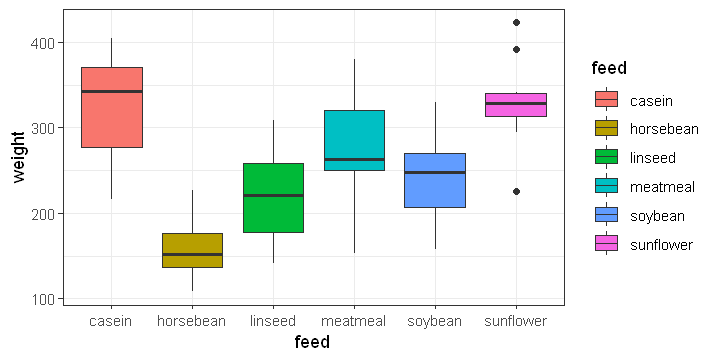

In [217]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(chickwts, aes(x = feed, y = weight, fill=feed)) + 
  geom_boxplot()

In [220]:
summary(chickwts)

     weight             feed   
 Min.   :108.0   casein   :12  
 1st Qu.:204.5   horsebean:10  
 Median :258.0   linseed  :12  
 Mean   :261.3   meatmeal :11  
 3rd Qu.:323.5   soybean  :14  
 Max.   :423.0   sunflower:12  

In [465]:
feeds = levels(chickwts$feed)
calc_mean = function(feed){
    mean(chickwts$weight[chickwts$feed==feed])
}

means = sapply(feeds, calc_mean)
means

casein horsebean   linseed  meatmeal   soybean sunflower 
 323.5833  160.2000  218.7500  276.9091  246.4286  328.9167

In [481]:
mod = lm(weight ~ feed-1, data = chickwts)
summary(mod)
anova(mod)


Call:
lm(formula = weight ~ feed - 1, data = chickwts)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.909  -34.413    1.571   38.170  103.091 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
feedcasein      323.58      15.83  20.436  < 2e-16 ***
feedhorsebean   160.20      17.35   9.236 1.91e-13 ***
feedlinseed     218.75      15.83  13.815  < 2e-16 ***
feedmeatmeal    276.91      16.54  16.744  < 2e-16 ***
feedsoybean     246.43      14.66  16.810  < 2e-16 ***
feedsunflower   328.92      15.83  20.773  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54.85 on 65 degrees of freedom
Multiple R-squared:  0.9629,	Adjusted R-squared:  0.9595 
F-statistic: 281.4 on 6 and 65 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
feed,6,5079211,846535.163,281.3761,1.677742e-44
Residuals,65,195556,3008.554,NA,NA


* Since the p value is lower than 0.05, we conclude that weights are different for different feeds.

In [235]:
R_squared = var(mod$fitted.values)/var(chickwts$weight)
R_squared

[1] 0.5416855

In [236]:
confint(mod)

,2.5 %,97.5 %
feedcasein,291.9608,355.2058
feedhorsebean,125.5593,194.8407
feedlinseed,187.1275,250.3725
feedmeatmeal,243.8805,309.9377
feedsoybean,217.1518,275.7053
feedsunflower,297.2942,360.5392


In [237]:
# Paiwise t-test with Bonferroni Correction
pairwise.t.test(chickwts$weight,chickwts$feed,p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  chickwts$weight and chickwts$feed 

          casein  horsebean linseed meatmeal soybean
horsebean 3.1e-08 -         -       -        -      
linseed   0.00022 0.22833   -       -        -      
meatmeal  0.68350 0.00011   0.20218 -        -      
soybean   0.00998 0.00487   1.00000 1.00000  -      
sunflower 1.00000 1.2e-08   9.3e-05 0.39653  0.00447

P value adjustment method: bonferroni 

* Here, we can see that except linseed-horsebean, meatmean-casein, linseed-meatmeal, linsee-soybean, meatmeal-soybean, casein-sunflower, meatmeal-sunflower, rest all differ significantly.

* We can also verify the same using Tukey comparisons

In [233]:
# Compute the analysis of variance
res.aov <- aov(weight ~ feed-1, data = chickwts)
# Summary of the analysis
summary(res.aov)
TukeyHSD(res.aov)

          Df  Sum Sq Mean Sq F value Pr(>F)    
feed       6 5079211  846535   281.4 <2e-16 ***
Residuals 65  195556    3009                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ feed - 1, data = chickwts)

$feed
                           diff         lwr       upr     p adj
horsebean-casein    -163.383333 -232.346876 -94.41979 0.0000000
linseed-casein      -104.833333 -170.587491 -39.07918 0.0002100
meatmeal-casein      -46.674242 -113.906207  20.55772 0.3324584
soybean-casein       -77.154762 -140.517054 -13.79247 0.0083653
sunflower-casein       5.333333  -60.420825  71.08749 0.9998902
linseed-horsebean     58.550000  -10.413543 127.51354 0.1413329
meatmeal-horsebean   116.709091   46.335105 187.08308 0.0001062
soybean-horsebean     86.228571   19.541684 152.91546 0.0042167
sunflower-horsebean  168.716667   99.753124 237.68021 0.0000000
meatmeal-linseed      58.159091   -9.072873 125.39106 0.1276965
soybean-linseed       27.678571  -35.683721  91.04086 0.7932853
sunflower-linseed    110.166667   44.412509 175.92082 0.0000884
soybean-meatmeal     -30.48051

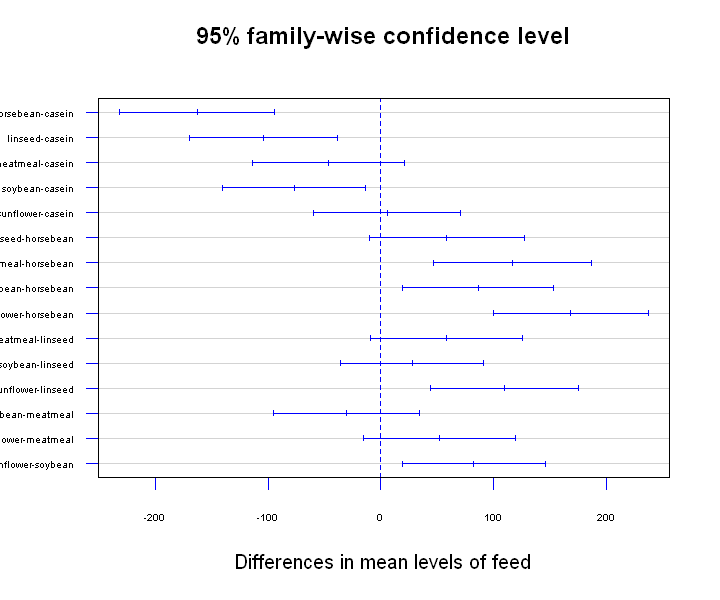

In [279]:
options(repr.plot.width=6, repr.plot.height=5)
plot(TukeyHSD(res.aov), las=1, cex.axis = 0.5, col = 'blue')

<b>(b) Perform all necessary model diagnostics.

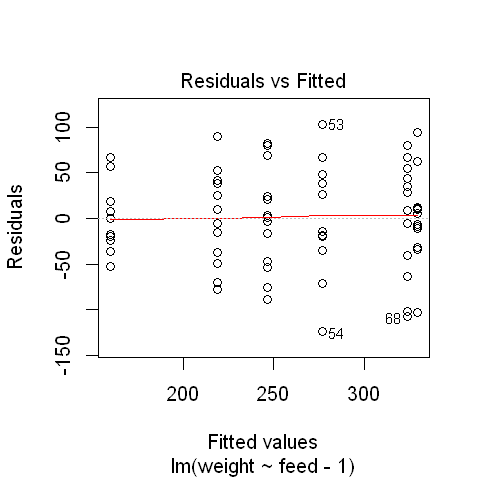

In [282]:
options(repr.plot.width=4, repr.plot.height=4)

plot(mod, 1)

In [269]:
# install.packages('car')
library(car)
leveneTest(weight ~ feed - 1, data = chickwts, center=mean)

,Df,F value,Pr(>F)
group,5,0.987329,0.4324101
,65,NA,NA


* In the residuals vs fitted plot, the erros seem to have zero mean and constant variances. Also, from leveneTest, the p value is greater than 5% $\alpha$ level, hence we can accept null hypothesis.

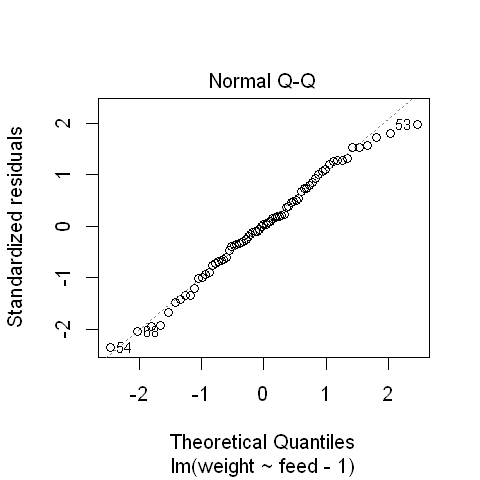

In [257]:
plot(mod, 2)

In [264]:
# Shapiro-Wilk test
shapiro.test(x = mod$residuals)


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.98616, p-value = 0.6272


* From the plot, as well as Shapiro-Wilk test, we can assume normality of the residuals.

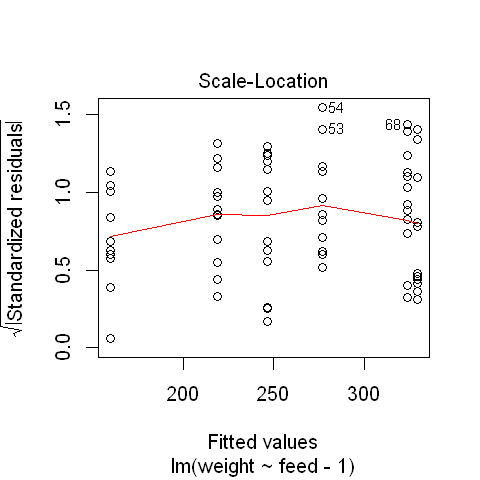

In [283]:
plot(mod,3)

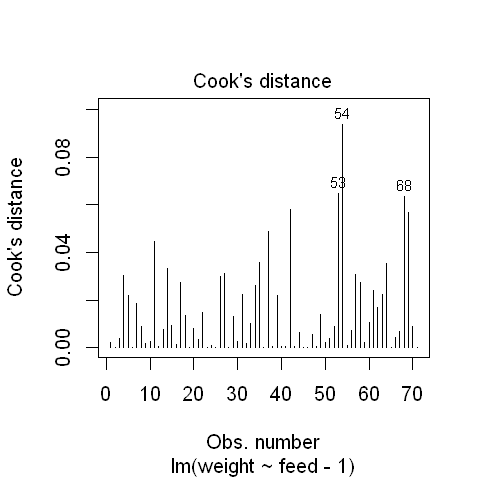

In [284]:
plot(mod, 4)

* The maximum cook's distance is ~0.09 which is within limits. Hence, we conclude that there are no outliers.

<b>Problem 3: Use the infmort data to fit a one-way ANOVA with income as the response and
region as the predictor.

(a) Determine whether income varies with region. Perform all necessary model diagnostics.

(b) In case income varies with region, determine which pairs of regions are different.

(c) In case you need a transformation for the response, re-fit the model and make a comparison with the previous results.

In [291]:
data(infmort)
head(infmort,2)
levels(infmort$region)

,region,income,mortality,oil
Australia,Asia,3426,26.7,no oil exports
Austria,Europe,3350,23.7,no oil exports


[1] "Africa"   "Europe"   "Asia"     "Americas"

<b>(a) Determine whether income varies with region. Perform all necessary model diagnostics.

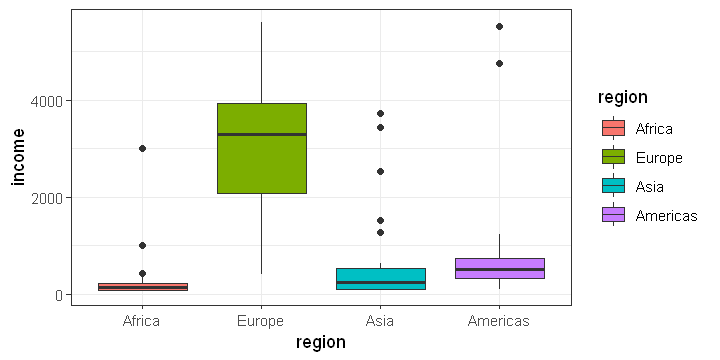

In [293]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(infmort, aes(x = region, y = income, fill=region)) + 
  geom_boxplot()

In [496]:
mod = lm(income ~ region-1, data = infmort)
summary(mod)
anova(mod)


Call:
lm(formula = income ~ region - 1, data = infmort)

Residuals:
    Min      1Q  Median      3Q     Max 
-2634.2  -515.9  -192.2     7.8  4583.1 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
regionAfrica      273.2      180.5   1.514  0.13317    
regionEurope     3040.2      248.0  12.257  < 2e-16 ***
regionAsia        638.9      192.1   3.325  0.00123 ** 
regionAmericas    939.9      219.4   4.283 4.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1052 on 101 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6289 
F-statistic: 45.48 on 4 and 101 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
region,4,201473156,50368289,45.47927,8.592504e-22
Residuals,101,111857493,1107500,NA,NA


In [497]:
R_squared = var(mod$fitted.values)/var(infmort$income)
R_squared

[1] 0.4641204

In [498]:
confint(mod)

,2.5 %,97.5 %
regionAfrica,-84.79121,631.2618
regionEurope,2548.16186,3532.2826
regionAsia,257.71835,1020.0150
regionAmericas,504.56751,1375.1716


In [488]:
# Paiwise t-test with Bonferroni Correction
pairwise.t.test(infmort$income,infmort$region,p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  infmort$income and infmort$region 

         Africa  Europe  Asia
Europe   7.7e-14 -       -   
Asia     1.00    7.2e-11 -   
Americas 0.13    3.9e-08 1.00

P value adjustment method: bonferroni 

In [494]:
# Compute the analysis of variance
res.aov <- aov(income ~ region-1, data = infmort)
# Summary of the analysis
summary(res.aov)
TukeyHSD(res.aov)

           Df    Sum Sq  Mean Sq F value Pr(>F)    
region      4 201473156 50368289   45.48 <2e-16 ***
Residuals 101 111857493  1107500                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = income ~ region - 1, data = infmort)

$region
                      diff         lwr       upr     p adj
Europe-Africa    2766.9869  1965.63247  3568.341 0.0000000
Asia-Africa       365.6314  -323.00285  1054.266 0.5103789
Americas-Africa   666.6343   -75.58589  1408.854 0.0945000
Asia-Europe     -2401.3556 -3220.99422 -1581.717 0.0000000
Americas-Europe -2100.3527 -2965.50075 -1235.205 0.0000000
Americas-Asia     301.0029  -460.92186  1062.928 0.7311095


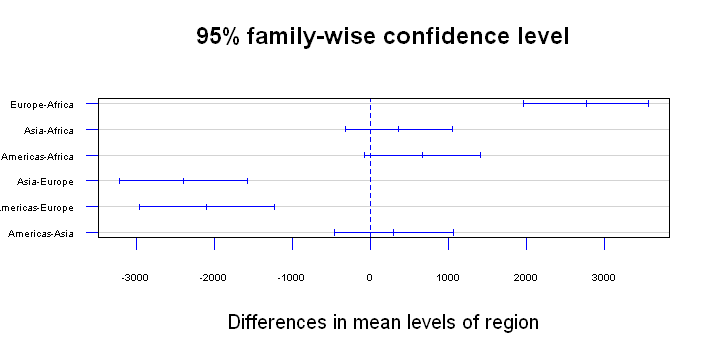

In [493]:
options(repr.plot.width=6, repr.plot.height=3)
plot(TukeyHSD(res.aov), las=1, cex.axis = 0.5, col = 'blue')

Here, we can see that Africa-Europe, Europe-Asia, Europe-Americas differ significantly.

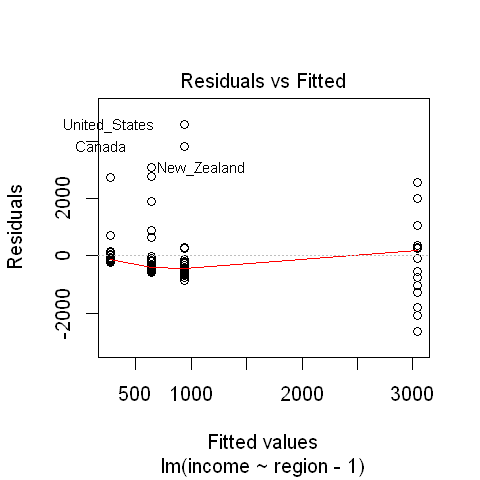

In [302]:
options(repr.plot.width=4, repr.plot.height=4)

plot(mod, 1)

In [303]:
leveneTest(income ~ region - 1, data = infmort, center=mean)

,Df,F value,Pr(>F)
group,3,5.869245,0.0009796424
,101,NA,NA


* In the residuals vs fitted plot, the erros seem to have different than zero mean and non-constant variances. Also, from leveneTest, the p value is less than 5%  𝛼  level, hence we reject the null hypothesis.

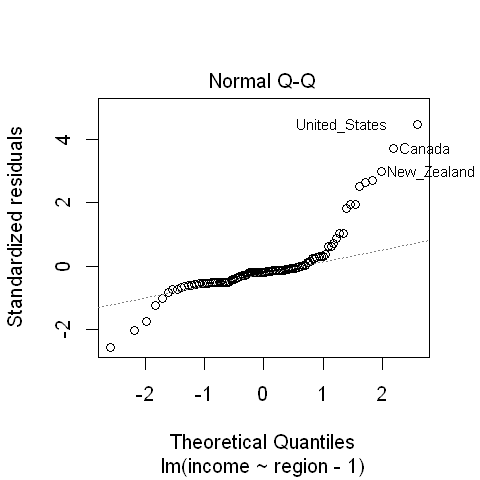

In [305]:
plot(mod, 2)

In [304]:
# Shapiro-Wilk test
shapiro.test(x = mod$residuals)


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.75507, p-value = 6.061e-12


* Since p value for Shapro-Wilk test is less than 5% $\alpha$ level, normality assumption is not met. It is clear from the normal Q-Q plot.

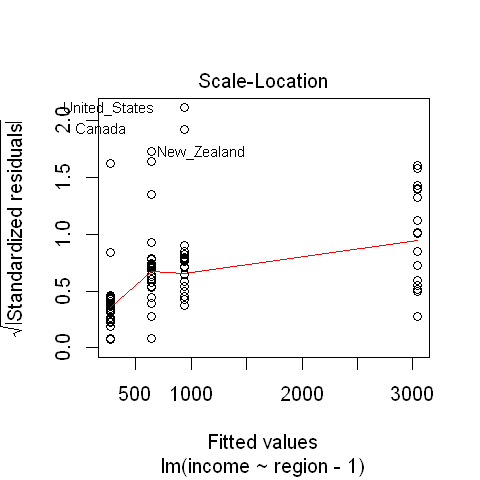

In [306]:
plot(mod, 3)

* From the above plot, we can see there are few data points that are far away from residuals mean.

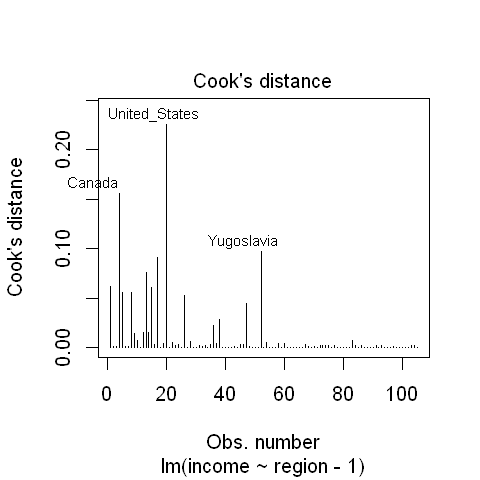

In [307]:
plot(mod, 4)

In [309]:
max(cooks.distance(mod))

[1] 0.2253218

* Maximum Cook's distance is ~0.22. Hence, we conclude there are no outliers.

<b>(b) In case income varies with region, determine which pairs of regions are different.

In [310]:
confint(mod)

,2.5 %,97.5 %
regionAfrica,-84.79121,631.2618
regionEurope,2548.16186,3532.2826
regionAsia,257.71835,1020.0150
regionAmericas,504.56751,1375.1716


In [311]:
# Paiwise t-test with Bonferroni Correction
pairwise.t.test(infmort$income,infmort$region,p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  infmort$income and infmort$region 

         Africa  Europe  Asia
Europe   7.7e-14 -       -   
Asia     1.00    7.2e-11 -   
Americas 0.13    3.9e-08 1.00

P value adjustment method: bonferroni 

In [312]:
# Compute the analysis of variance
res.aov <- aov(income ~ region-1, data = infmort)
# Summary of the analysis
summary(res.aov)
TukeyHSD(res.aov)

           Df    Sum Sq  Mean Sq F value Pr(>F)    
region      4 201473156 50368289   45.48 <2e-16 ***
Residuals 101 111857493  1107500                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = income ~ region - 1, data = infmort)

$region
                      diff         lwr       upr     p adj
Europe-Africa    2766.9869  1965.63247  3568.341 0.0000000
Asia-Africa       365.6314  -323.00285  1054.266 0.5103789
Americas-Africa   666.6343   -75.58589  1408.854 0.0945000
Asia-Europe     -2401.3556 -3220.99422 -1581.717 0.0000000
Americas-Europe -2100.3527 -2965.50075 -1235.205 0.0000000
Americas-Asia     301.0029  -460.92186  1062.928 0.7311095


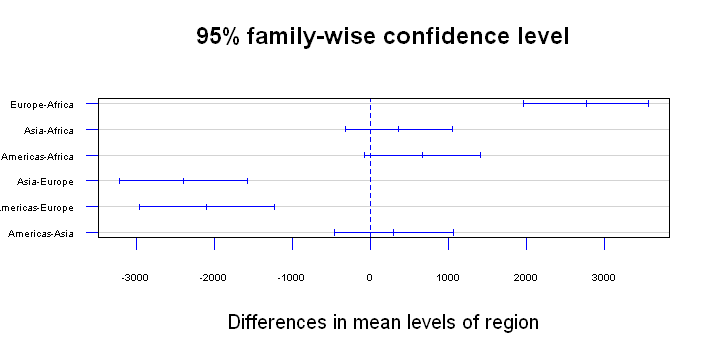

In [313]:
options(repr.plot.width=6, repr.plot.height=3)
plot(TukeyHSD(res.aov), las=1, cex.axis = 0.5, col = 'blue')

Here, we can see that Africa-Europe, Europe-Asia, Europe-Americas differ significantly.

<b>(c) In case you need a transformation for the response, re-fit the model and make a comparison with the previous results.

* We can try log transformation

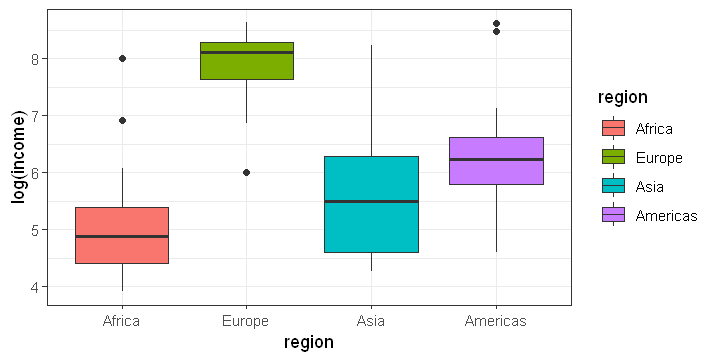

In [385]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(infmort, aes(x = region, y = log(income), fill=region)) + 
  geom_boxplot()

In [386]:
mod = lm(log(income) ~ region-1, data = infmort)
summary(mod)
anova(mod)


Call:
lm(formula = log(income) ~ region - 1, data = infmort)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85632 -0.68738 -0.08462  0.41350  2.92786 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
regionAfrica     5.0818     0.1630   31.18   <2e-16 ***
regionEurope     7.8627     0.2240   35.10   <2e-16 ***
regionAsia       5.6619     0.1735   32.63   <2e-16 ***
regionAmericas   6.3404     0.1982   32.00   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9503 on 101 degrees of freedom
Multiple R-squared:  0.977,	Adjusted R-squared:  0.9761 
F-statistic:  1073 on 4 and 101 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
region,4,3877.16635,969.2915882,1073.336,8.994771e-82
Residuals,101,91.20952,0.9030646,NA,NA


In [387]:
R_squared = var(mod$fitted.values)/var(log(infmort$income))
R_squared

[1] 0.5159259

In [388]:
confint(mod)

,2.5 %,97.5 %
regionAfrica,4.758536,5.405132
regionEurope,7.418343,8.307003
regionAsia,5.317673,6.006027
regionAmericas,5.947370,6.733526


In [389]:
# Paiwise t-test with Bonferroni Correction
pairwise.t.test(log(infmort$income),infmort$region,p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  log(infmort$income) and infmort$region 

         Africa  Europe  Asia 
Europe   4.4e-16 -       -    
Asia     0.099   4.1e-11 -    
Americas 2.1e-05 1.0e-05 0.069

P value adjustment method: bonferroni 

In [390]:
# Compute the analysis of variance
res.aov <- aov(log(income) ~ region-1, data = infmort)
# Summary of the analysis
summary(res.aov)
TukeyHSD(res.aov)

           Df Sum Sq Mean Sq F value Pr(>F)    
region      4   3877   969.3    1073 <2e-16 ***
Residuals 101     91     0.9                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(income) ~ region - 1, data = infmort)

$region
                      diff          lwr        upr     p adj
Europe-Africa    2.7808389  2.057216174  3.5044617 0.0000000
Asia-Africa      0.5800160 -0.041820426  1.2018524 0.0767083
Americas-Africa  1.2586139  0.588389434  1.9288384 0.0000210
Asia-Europe     -2.2008229 -2.940956307 -1.4606896 0.0000000
Americas-Europe -1.5222250 -2.303453357 -0.7409966 0.0000098
Americas-Asia    0.6785979 -0.009419797  1.3666157 0.0546802


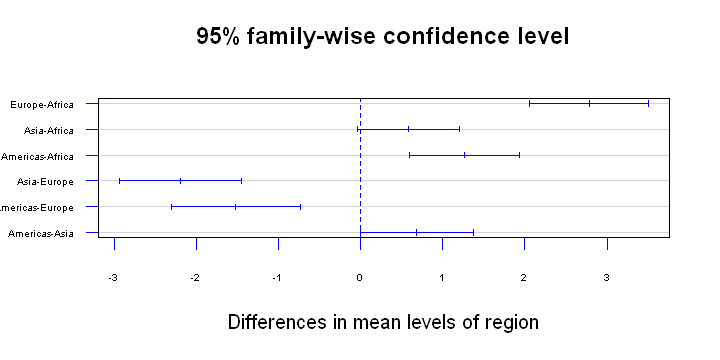

In [391]:
options(repr.plot.width=6, repr.plot.height=3)
plot(TukeyHSD(res.aov), las=1, cex.axis = 0.5, col = 'blue')

Here, we can see that Africa-Europe, Europe-Asia, Europe-Americas, and Americas-Africa differ significantly. Asia-Africa and Americas-Asia have p-value close to 5% $\alpha$ level.

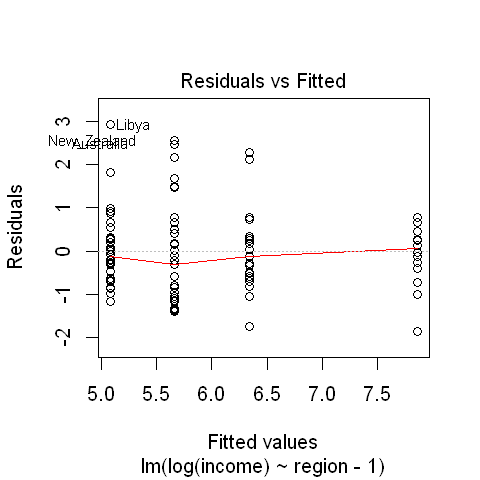

In [392]:
options(repr.plot.width=4, repr.plot.height=4)

plot(mod, 1)

In [393]:
leveneTest(log(income) ~ region - 1, data = infmort, center=mean)

,Df,F value,Pr(>F)
group,3,3.32169,0.02280456
,101,NA,NA


* In the residuals vs fitted plot, the erros seem to have different than zero mean and non-constant variances. Also, from leveneTest, the p value is less than 5%  𝛼  level, hence we reject the null hypothesis.

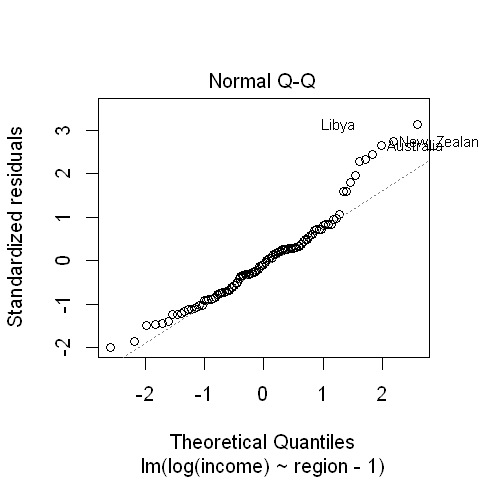

In [394]:
plot(mod, 2)

In [395]:
# Shapiro-Wilk test
shapiro.test(x = mod$residuals)


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.94863, p-value = 0.0004753


* Since p value for Shapro-Wilk test is less than 5% $\alpha$ level, normality assumption is not met. It is clear from the normal Q-Q plot.

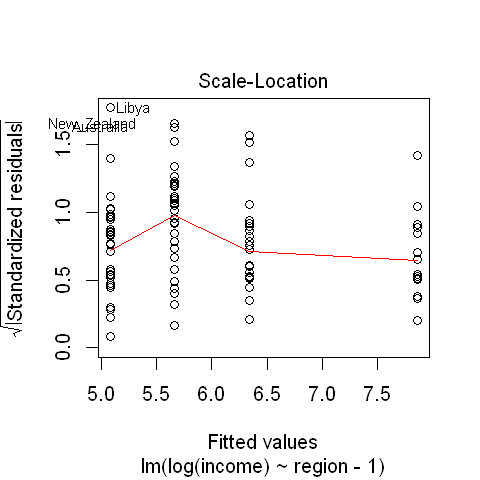

In [396]:
plot(mod, 3)

* From the above plot, we can see there are few data points that are far away from residuals mean.

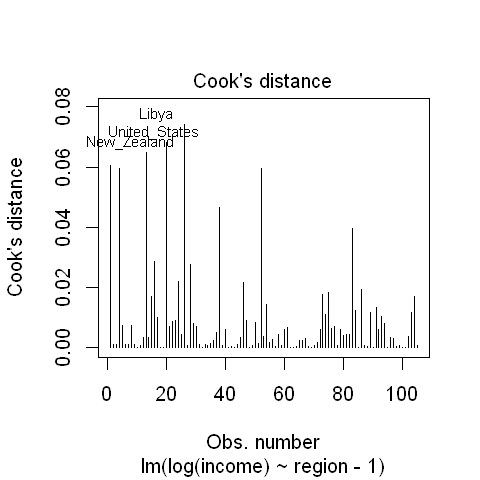

In [397]:
plot(mod, 4)

In [398]:
max(cooks.distance(mod))

[1] 0.07409233

* Maximum Cook's distance is ~0.07. Hence, we conclude there are no outliers.

* After transforming income with log, we can see distinction between few more region was more clear.